In [157]:
# K_nl, I_nl
import numpy as np
from scipy.special import gamma
from math import factorial
from __future__ import division

def diracdelta(m,n):
    if m == n:
        return 1
    else:
        return 0

def Knl(n,l):
    return(0.5*n*(n + 4*l + 3) + (l + 1)*(2*l + 1))

def Inl(n,l,m):
    if m<=l:
        return(Knl(n,l)*1/(2**(8*l + 6))*gamma(n + 4*l + 3)/(factorial(n)*(n + 2*l + 3/2) *\
             (gamma(2*l + 3/2))**2 )*(1 + diracdelta(m,0))*np.pi*2/(2*l + 1)*(factorial(l + m)/factorial(l - m)))
    else:
        return('m must be smaller or equal to l') # just a temporary solution for bad input

In [152]:
#ksi, RRr - for evaluation of Anlm; not used yet
from scipy.special import gegenbauer

def RRr(n,l,r):
    rs = 1. #kpc !!!
    ksi = (r - 1)/(r + 1)
    return((r/rs)**l/((1 + r/rs)**(2*l + 1))*r**2)#*gegenbauer(n, 2*l + 3/2, ksi))

In [159]:
#Phinlm, transform
from scipy.special import lpmv # http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.special.lpmv.html
from scipy.special import eval_gegenbauer
    
def transform(r = False, theta = False, rho = False, z = False): # (r, theta, phi) <-> (rho, phi, z)
    if not theta and not r:
        return(np.sqrt(rho**2 + z**2), np.arccos(z/np.sqrt(rho**2 + z**2))) # (rho, z) transformed to (r, theta)
    elif not z and not rho:
        return(r*np.sin(theta), r*np.cos(theta)) # (r, theta) transformed to (rho, z)
    else:
        return('please specify coordinates you wish to transform') # should be unnecessary later on
        
def Phinlm(n,l,m,r,phi,z):
    r, theta = transform(rho = r, z = z)
    s = r/1. # 1. is in kpc!!!!!
    return(s**l/((1 + s)**(2*l + 1))*eval_gegenbauer(n, 2*l + 3/2, (s - 1)/(s + 1))*np.cos(m*phi)*lpmv(m, l, np.cos(theta)))
print(Phinlm(1,3,1,3,1,1))

0.00437697105888


In [154]:
#Anlm
'''
import scipy.integrate as integrate # http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
def Anlm(n,l,m,r,theta,phi):
    return(None)
'''
Anlm = np.array([
        [ 0,  0,  0,  1.509],
        [ 1,  0,  0, -0.086],
        [ 2,  0,  0, -0.033],
        [ 3,  0,  0, -0.020],
        [ 0,  2,  0, -2.606],
        [ 1,  2,  0, -0.221],
        [ 2,  2,  0, -0.001],
        [ 0,  2,  2,  0.665],
        [ 1,  2,  2,  0.129],
        [ 2,  2,  2,  0.006],
        [ 0,  4,  0,  6.406],
        [ 1,  4,  0,  1.295],
        [ 0,  4,  2, -0.660],
        [ 1,  4,  2, -0.140],
        [ 0,  4,  4,  0.044],
        [ 1,  4,  4, -0.012],
        [ 0,  6,  0, -5.859],
        [ 0,  6,  2,  0.984],
        [ 0,  6,  4, -0.030],
        [ 0,  6,  6,  0.001],])

In [155]:
#Phi

def Phi(r,phi,z):
    # the constant (GM_{bar}/r_s) is set to one... but is that correct...? Now I don't think so...
    Phisum = 0
    for i in range(len(Anlm)):
        Phisum += Anlm[i,3]*Phinlm(Anlm[i,0], Anlm[i,1], Anlm[i,2], r, phi, z)
    return(Phisum)
print(Phi(3,1,1))

0.331592652133


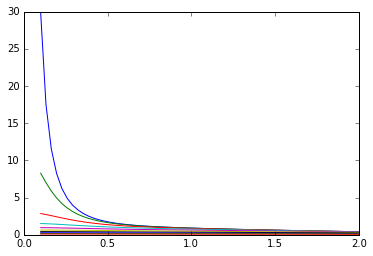

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

M_bar = 2.0*10**10 #M_sun 
x_0 = 1.49 #kpc
y_0 = 0.58 #kpc
z_0 = 0.40 #kpc
q = 0.6
rho_0 = 1 #!!!!!!!!!!!!!!!!!!!

def rho(r, phi, z, x_0 = 1.49, y_0 = 0.58, z_0 = 0.40, q = 0.6, rho_0 = 1): # units!!!!!
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    lrho = []
    r_1 = (((x/x_0)**2 + (y/y_0)**2)**2 + (z/z_0)**4)**0.25
    r_2 = ((q**2*(x**2 + y**2) + z**2)/z_0**2)**0.5
    for i in range(len(r_1)):
        lrho.append(rho_0*(np.exp(-r_1[i]**2/2.) + r_2[i]**(-1.85)*np.exp(-r_2[i])))
    return(lrho)     

r = np.linspace(0.1, 2.0, 61)
phi = np.zeros(len(x))
z = np.zeros(len(x))

for i in range(10):
    plt.plot(r, rho(x,phi,(z+i)/10))

plt.show()